In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode
from keras.models import Model
from keras.layers import Input, BatchNormalization, LSTM, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import Precision, Recall

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyttsx3  # require to install espeak (sudo apt/dnf install espeak)

In [2]:
df = pd.read_csv('../data/train/words.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'bad': 0, 'deaf': 1, 'fine': 2, 'good': 3, 'goodbye': 4, 'hello': 5, 'hungry': 6, 'me': 7, 'no': 8, 'please': 9, 'sorry': 10, 'thankyou': 11, 'yes': 12, 'you': 13}
(504000, 11) (504000, 14)
(3360, 150, 11) (3360, 150, 14)


In [3]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(2688, 150, 11) (672, 150, 11)
(2688, 150, 14) (672, 150, 14)


In [4]:
input_layer = Input(shape=(150, 11), name='input_layer')
batch_layer1 = BatchNormalization(name='hidden_layer1')(input_layer)
lstm_layer = LSTM(units=64, return_sequences=True, name='hidden_layer2')(batch_layer1)
batch_layer2 = BatchNormalization(name='hidden_layer3')(lstm_layer)
output_layer = Dense(units=len(label_dict), activation='softmax', name='output_layer')(batch_layer2)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy', Precision(), Recall()])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

2023-04-18 23:07:20.018274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 23:07:20.020997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 23:07:20.023476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-04-18 23:07:20.901009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 23:07:20.913952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 23:07:20.926007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

84/84 [==============================] - ETA: 0s - loss: 1.3998 - accuracy: 0.5781 - precision: 0.8736 - recall: 0.3455

2023-04-18 23:07:31.794261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 23:07:31.797930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 23:07:31.801255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

84/84 [==============================] - 13s 107ms/step - loss: 1.3998 - accuracy: 0.5781 - precision: 0.8736 - recall: 0.3455 - val_loss: 1.3376 - val_accuracy: 0.7237 - val_precision: 0.9868 - val_recall: 0.1273
Epoch 2/50
84/84 [==============================] - 7s 89ms/step - loss: 0.6771 - accuracy: 0.7801 - precision: 0.8822 - recall: 0.6795 - val_loss: 0.7453 - val_accuracy: 0.8160 - val_precision: 0.9404 - val_recall: 0.6366
Epoch 3/50
84/84 [==============================] - 7s 83ms/step - loss: 0.5211 - accuracy: 0.8258 - precision: 0.9036 - recall: 0.7589 - val_loss: 0.4709 - val_accuracy: 0.8709 - val_precision: 0.9452 - val_recall: 0.7853
Epoch 4/50
84/84 [==============================] - 8s 90ms/step - loss: 0.4349 - accuracy: 0.8510 - precision: 0.9190 - recall: 0.7981 - val_loss: 0.3583 - val_accuracy: 0.8954 - val_precision: 0.9528 - val_recall: 0.8308
Epoch 5/50
84/84 [==============================] - 10s 115ms/step - loss: 0.4178 - accuracy: 0.8540 - precision: 0.9

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 11)]         0         
                                                                 
 hidden_layer1 (BatchNormali  (None, 150, 11)          44        
 zation)                                                         
                                                                 
 hidden_layer2 (LSTM)        (None, 150, 64)           19456     
                                                                 
 hidden_layer3 (BatchNormali  (None, 150, 64)          256       
 zation)                                                         
                                                                 
 output_layer (Dense)        (None, 150, 14)           910       
                                                                 
Total params: 20,666
Trainable params: 20,516
Non-trainable p

In [6]:
model.save('../models/words.h5')

In [9]:
df_test = pd.read_csv('../data/test/words.csv')
X_test = df_test[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels_test = df_test.iloc[:, -1]
y_test = np.array([label_dict[label] for label in labels_test])
y_test = to_categorical(y_test, num_classes=len(label_dict))

print(X_test.shape, y_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0]//150, 150, X_test.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0]//150, 150, y_test.shape[1]))
print(X_test.shape, y_test.shape)

(42000, 11) (42000, 14)
(280, 150, 11) (280, 150, 14)


In [10]:
results = model.evaluate(X_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])
print("Test precision:", results[2])
print("Test recall:", results[3])

2023-04-18 23:14:09.368375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 23:14:09.374034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 23:14:09.391930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 2s 31ms/step - loss: 0.1273 - accuracy: 0.9515 - precision: 0.9609 - recall: 0.9400
Test loss: 0.1273132860660553
Test accuracy: 0.951452374458313
Test precision: 0.9609336853027344
Test recall: 0.9399762153625488


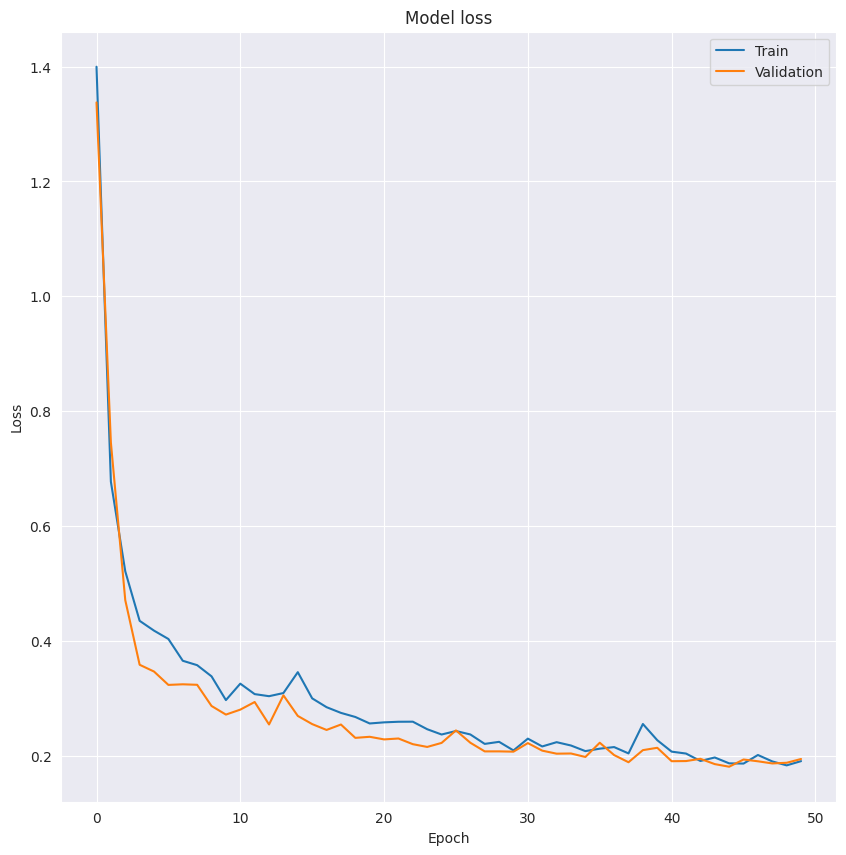

In [11]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

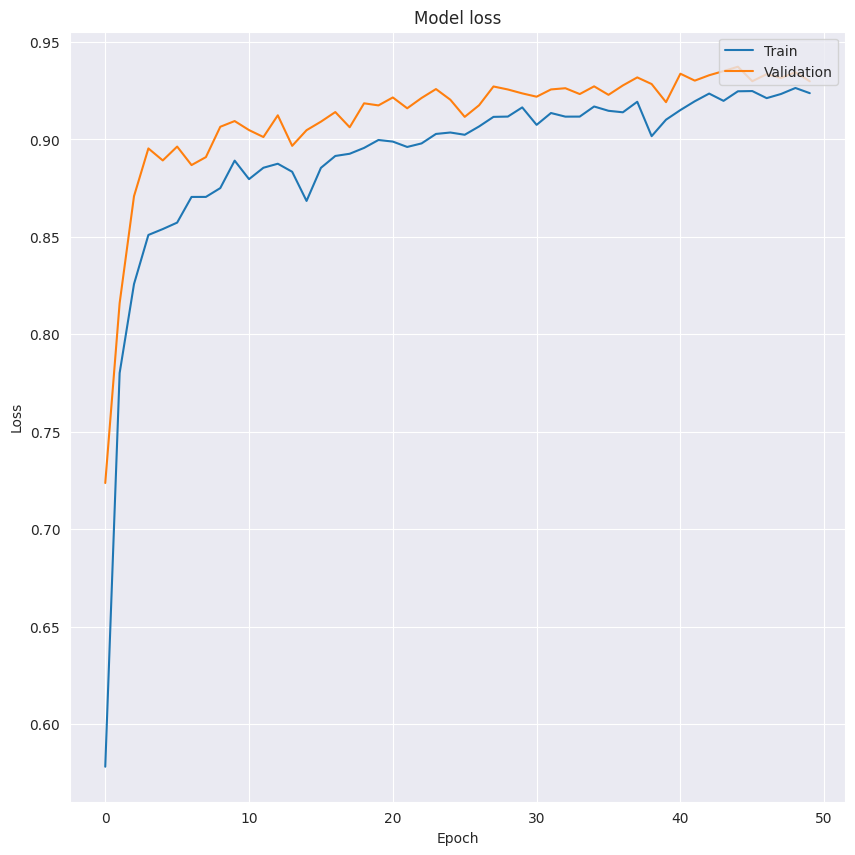

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [13]:
y_pred = model.predict(X_test)
predictions = np.argmax(y_pred, axis=2)
print(predictions)
major = mode(predictions, axis=1)[0].squeeze()
count = mode(predictions, axis=1)[1].squeeze()
print(f"Predictions    : {major}")
print(f"Appeared times : {count}")

2023-04-18 23:14:26.502333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 23:14:26.505811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 23:14:26.509092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 1s 27ms/step
[[ 0  4  4 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 7  7  7 ... 13 13 13]
 [ 7  7  7 ... 13 13 13]
 [ 7  7  7 ... 13 13 13]]
Predictions    : [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13  0  0  0  0
  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5
  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7
  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11

/tmp/ipykernel_8515/310183563.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  major = mode(predictions, axis=1)[0].squeeze()
/tmp/ipykernel_8515/310183563.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  count = mode(predictions, axis=1)[1].squeeze()


In [14]:
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if val == value:
            return key

predictions_list = []
for word in major:
    predictions_list.append(get_key(label_dict, word))
print(predictions_list)

['bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'deaf', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'fine', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'hungry', 'me', 'me', 'me', 'me', 'me', 'me', 'me', 'me', 'me', 'me', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'please', 'please', 'please', 'please', 'please', 'please', 'please', 'please', 'please', 'please', 'sorry', 'sorry', 'sorry', 'sorry', 'sorry', 'sorry', 'sorry', 'sorry', 'sorry', 'sorry', 'thankyou', 'thankyou', 'thankyou', 'thankyou', 'thankyou', 'thankyou', 'thanky

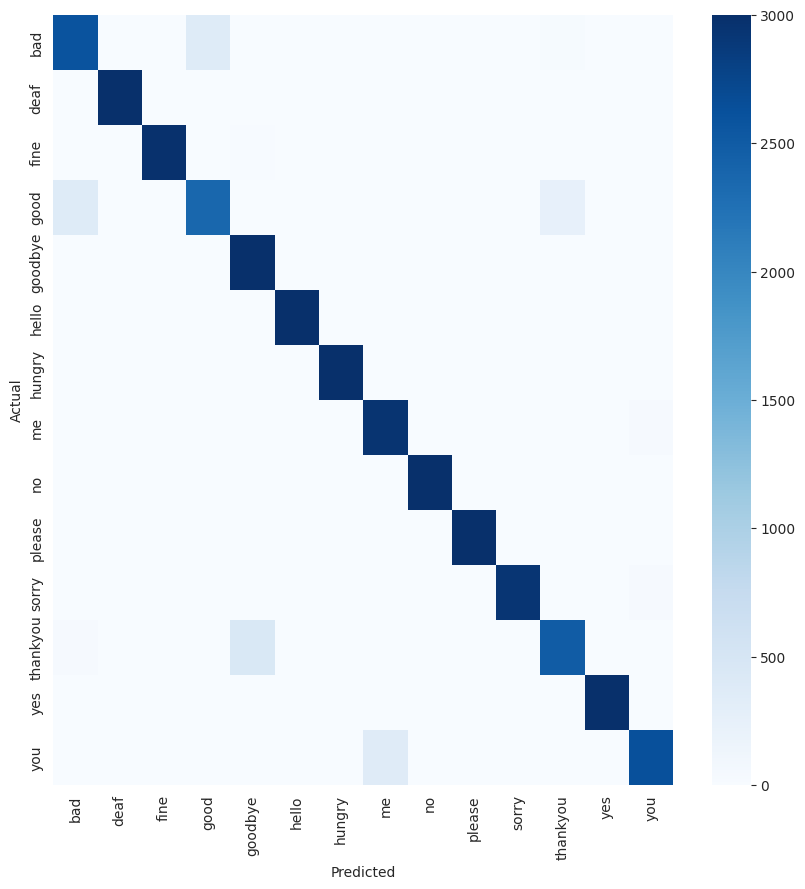

Accuracy: 95.15%


In [15]:
words_cm = confusion_matrix(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(10, 10))
sns.heatmap(words_cm, cmap='Blues', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(words_cm)) / np.sum(words_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [16]:
print(classification_report(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3000
           1       1.00      1.00      1.00      3000
           2       1.00      0.99      1.00      3000
           3       0.86      0.79      0.82      3000
           4       0.87      1.00      0.93      3000
           5       1.00      1.00      1.00      3000
           6       1.00      1.00      1.00      3000
           7       0.89      0.98      0.93      3000
           8       1.00      1.00      1.00      3000
           9       1.00      1.00      1.00      3000
          10       1.00      0.98      0.99      3000
          11       0.90      0.83      0.86      3000
          12       1.00      1.00      1.00      3000
          13       0.97      0.88      0.92      3000

    accuracy                           0.95     42000
   macro avg       0.95      0.95      0.95     42000
weighted avg       0.95      0.95      0.95     42000



In [17]:
engine = pyttsx3.init()
engine.say(", ".join(predictions_list))
engine.runAndWait()